In [28]:
import numpy
import pandas

import matplotlib.pyplot as pyplot
import seaborn

In [17]:
contam = pandas.read_csv("contam2022.csv", index_col=0)

contam.columns = ["ozono", "dioxido_azufre", "dioxido_nitrogeno", "monoxido_carbono", "PM10"]

contam.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [18]:
contam.describe()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,27.238470,7.128311,15.446575,5.365868,49.600000
std,10.683100,5.100674,3.789316,1.750875,18.261962
min,9.625000,2.000000,7.458333,2.208333,15.125000
25%,18.666667,4.000000,12.500000,4.041667,35.583333
50%,25.708333,5.666667,15.250000,5.083333,48.000000
75%,33.916667,8.416667,17.875000,6.291667,61.250000
max,67.000000,34.416667,29.666667,12.000000,106.916667


## Coeficiente de asimetría

$$
\eta = \frac{1}{n} \sum_{i = 1}^{n} \frac{(x_i - \overline{x}) ^ 3}{S^3}
$$

Tipo de sesgo:

* $\eta > 0$ - Sesgo positivo
* $\eta \approx 0$ - Casi insesgado
* $\eta < 0$ - Sesgo negativo

In [19]:
contam.skew()

ozono                0.848267
dioxido_azufre       2.038503
dioxido_nitrogeno    0.530644
monoxido_carbono     1.014769
PM10                 0.467447
dtype: float64

<Axes: ylabel='Density'>

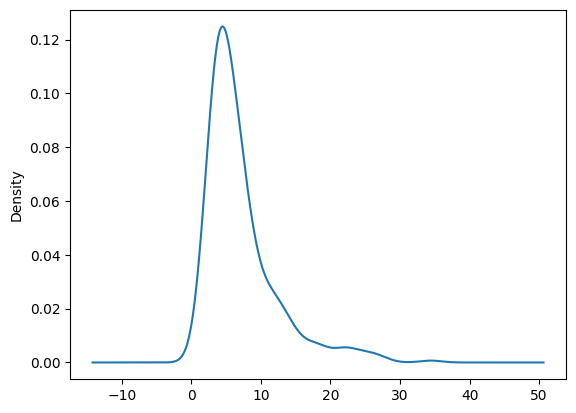

In [26]:
contam["dioxido_azufre"].plot.density()

## Curtosis

$$
\beta = \frac{1}{n} \sum_{i = 1}^{n} \frac{(x_i - \overline{x}) ^ 4}{S^4}
$$

Tipos de curtosis:

* **Leptokurtic** - Estrecha ($\beta > 0$)
* **Mesokurtic** - Normal ($\beta \approx 0$)
* **Platykurtic** - Oval ($\beta < 0$)

In [23]:
contam.kurt()

ozono                0.608176
dioxido_azufre       4.881479
dioxido_nitrogeno    0.300435
monoxido_carbono     1.239080
PM10                -0.166532
dtype: float64

<Axes: ylabel='Density'>

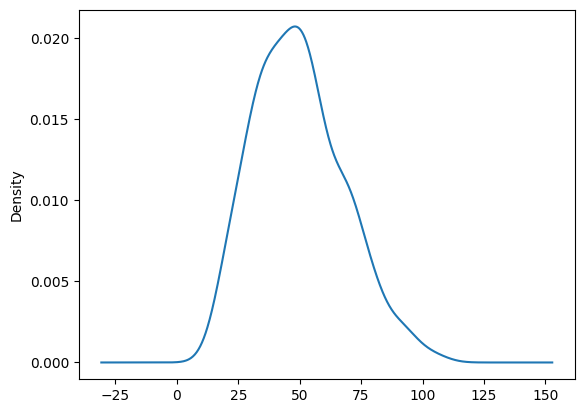

In [25]:
contam["PM10"].plot.density()

## Coeficiente de Pearson

$$
\rho = \frac{ \sum_{i=1}^{n} (x - \overline{x}) \cdot (y - \overline{y}) }{\sigma_x \cdot \sigma_y}
$$

1. Nivel de medición: Deben ser invervalares
2. Datos pareados: Debe contener pares $(x_i, y_i)$
3. Normal bivariada: La distribución conjunta debe ser normal bivariada, es decir, ambos deben tener distribución normal.

In [27]:
contam.corr(method="pearson")

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,1.000000,0.101920,0.142250,-0.003331,0.481932
dioxido_azufre,0.101920,1.000000,0.310672,0.180158,0.456039
dioxido_nitrogeno,0.142250,0.310672,1.000000,0.844692,0.626440
monoxido_carbono,-0.003331,0.180158,0.844692,1.000000,0.559163
PM10,0.481932,0.456039,0.626440,0.559163,1.000000


<Axes: >

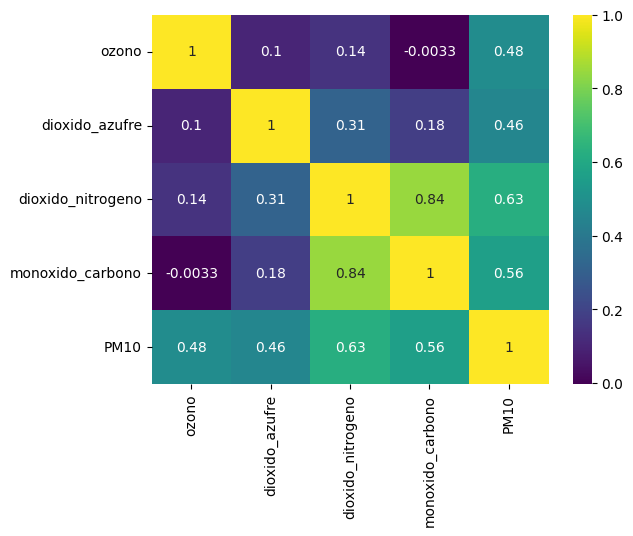

In [30]:
seaborn.heatmap(contam.corr(method="pearson"), annot=True, cmap="viridis")

## Prueba de Shapiro-Wilk

1. $H_0$: La muestra proviene de una distribución normal, la aceptamos con $p >= 0.05$
2. $H_1$: La muestra no proviene de una distribución normal, si $p < 0.05$

In [31]:
from scipy.stats import shapiro

In [36]:
for column in contam.columns:
    r, p_value = shapiro(contam[column])
    print(f"{column:>20s}: r = {r:.4f} | p-value = {p_value:.10f}")

               ozono: r = 0.9465 | p-value = 0.0000000003
      dioxido_azufre: r = 0.7907 | p-value = 0.0000000000
   dioxido_nitrogeno: r = 0.9812 | p-value = 0.0001087654
    monoxido_carbono: r = 0.9407 | p-value = 0.0000000001
                PM10: r = 0.9798 | p-value = 0.0000548812


Coeficiente de correlación de Spearman

$$
\rho = 1 - \frac{6 \sum_{i = 1}^{n} d_i^2}{n \cdot (n^2 - 1)}
$$

* $d$ - Diferencia en el *rank* o posición en la pareja de observaciones, es decir, ordenados por el primer eje y ordenados por el segundo eje.
* $n$ - Observaciones

In [37]:
contam.corr(method = "spearman")

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
ozono,1.000000,0.197253,0.181516,0.051342,0.481537
dioxido_azufre,0.197253,1.000000,0.416420,0.296297,0.585443
dioxido_nitrogeno,0.181516,0.416420,1.000000,0.847467,0.643303
monoxido_carbono,0.051342,0.296297,0.847467,1.000000,0.571305
PM10,0.481537,0.585443,0.643303,0.571305,1.000000


<Axes: >

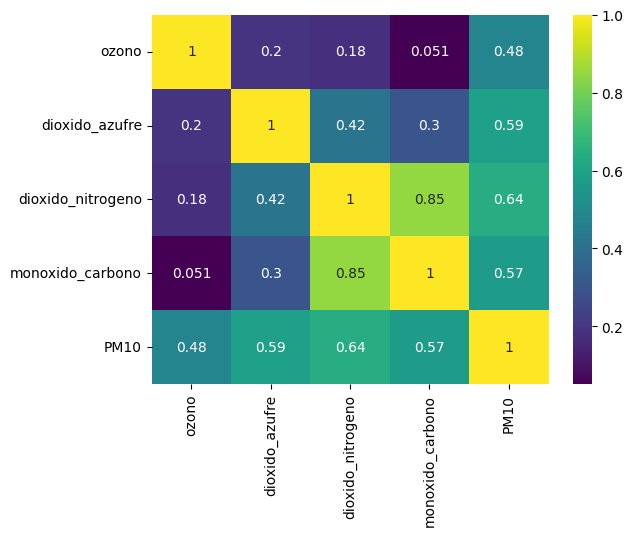

In [41]:
seaborn.heatmap(contam.corr(method = "spearman"), annot=True, cmap="viridis")

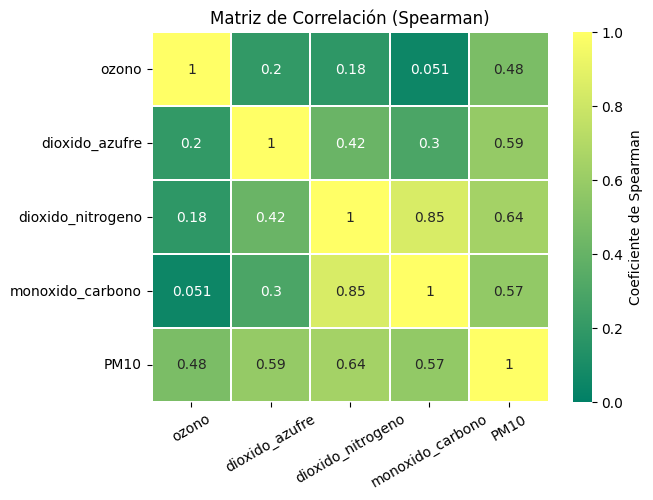

In [61]:
seaborn.heatmap(contam.corr(method = "spearman"), 
    annot=True, 
    cmap="summer",
    linewidths=0.2,
    cbar_kws={
        "label": "Coeficiente de Spearman"
    },
    vmin=0,
    vmax=1,
    center=0.5
)

pyplot.title("Matriz de Correlación (Spearman)")
pyplot.xticks(rotation=30)
pyplot.show()

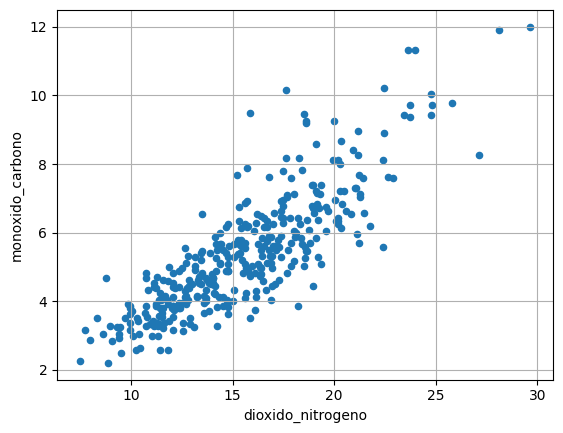

In [64]:
contam.plot.scatter(x="dioxido_nitrogeno", y="monoxido_carbono")
pyplot.grid(True)
pyplot.show()

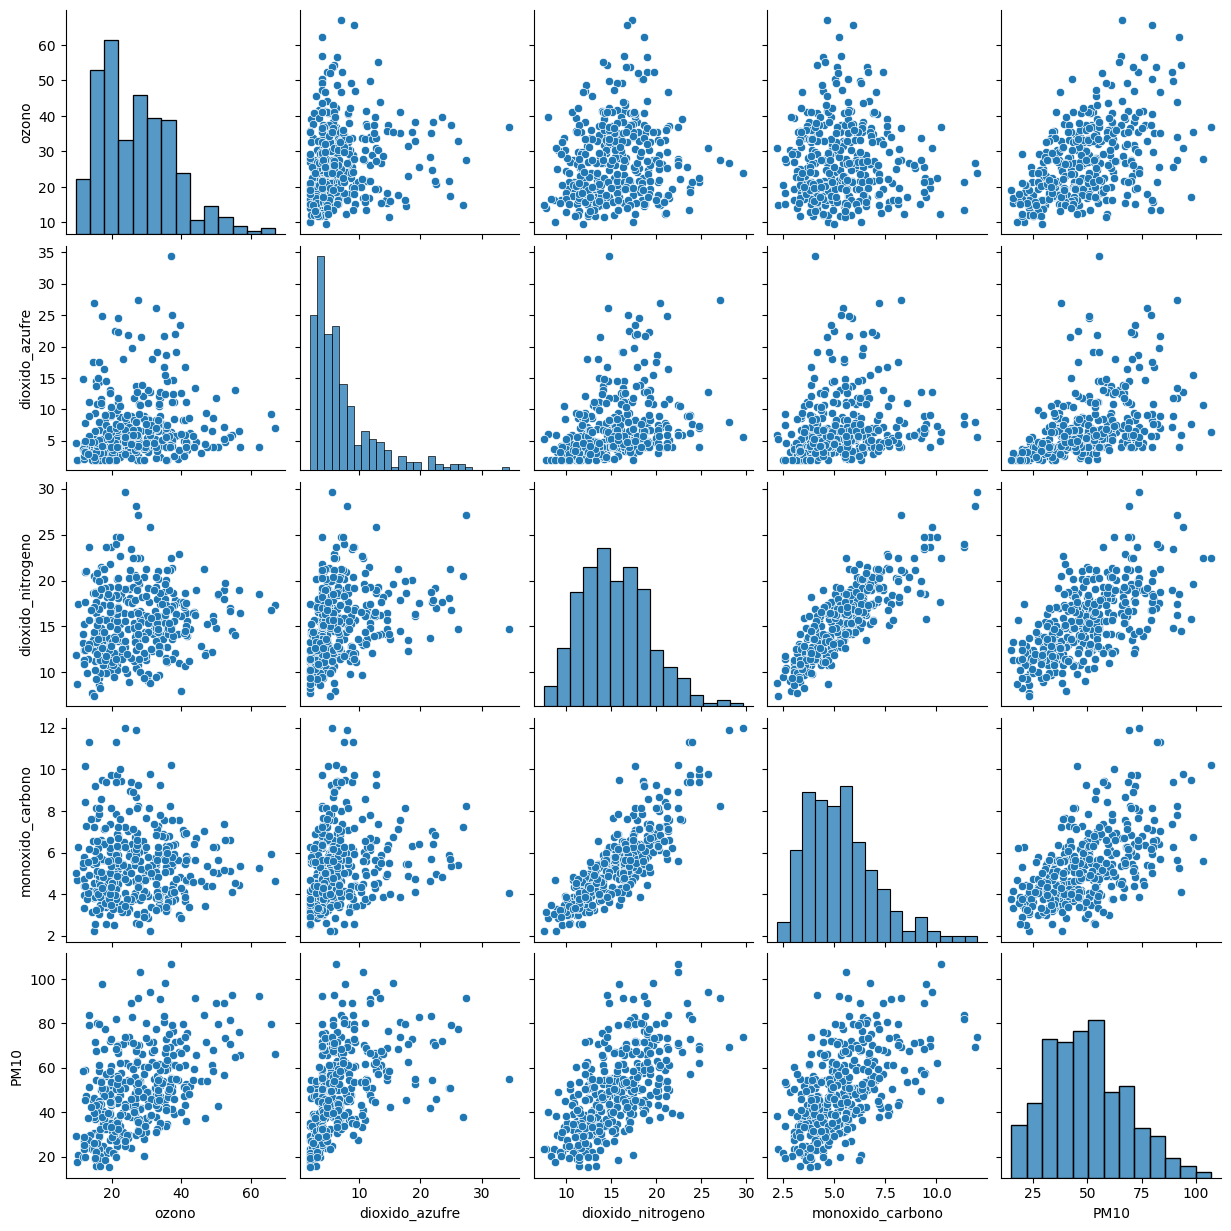

In [65]:
seaborn.pairplot(contam)

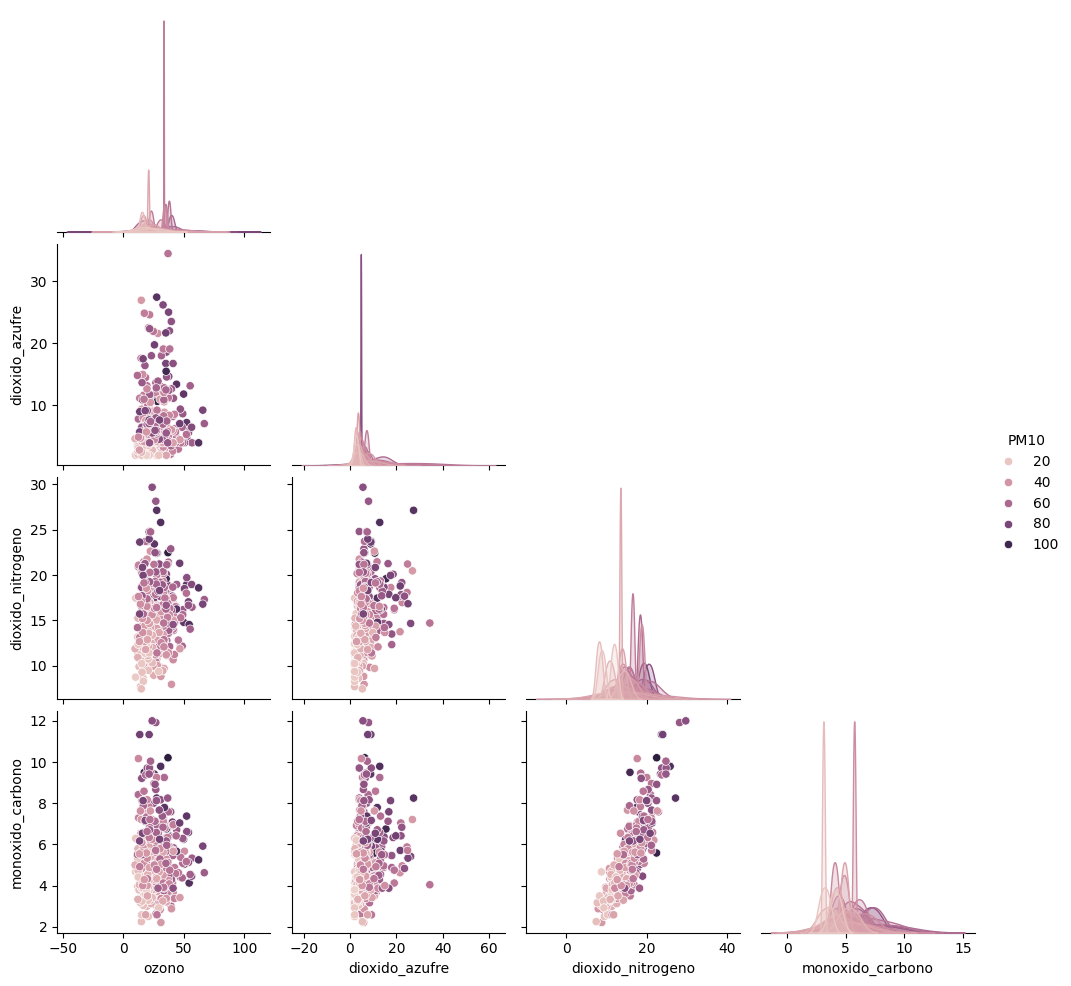

In [67]:
seaborn.pairplot(contam, hue="PM10", corner=True)

In [74]:
contam.corr(method="spearman").unstack().sort_values(ascending=False)

ozono              ozono                1.000000
dioxido_azufre     dioxido_azufre       1.000000
monoxido_carbono   monoxido_carbono     1.000000
dioxido_nitrogeno  dioxido_nitrogeno    1.000000
PM10               PM10                 1.000000
dioxido_nitrogeno  monoxido_carbono     0.847467
monoxido_carbono   dioxido_nitrogeno    0.847467
PM10               dioxido_nitrogeno    0.643303
dioxido_nitrogeno  PM10                 0.643303
dioxido_azufre     PM10                 0.585443
PM10               dioxido_azufre       0.585443
monoxido_carbono   PM10                 0.571305
PM10               monoxido_carbono     0.571305
                   ozono                0.481537
ozono              PM10                 0.481537
dioxido_nitrogeno  dioxido_azufre       0.416420
dioxido_azufre     dioxido_nitrogeno    0.416420
                   monoxido_carbono     0.296297
monoxido_carbono   dioxido_azufre       0.296297
ozono              dioxido_azufre       0.197253
dioxido_azufre     o

In [73]:
import pingouin

In [81]:
corr = pingouin.pairwise_corr(contam, method="spearman")
corr.round(3).sort_values(by="r", ascending=False)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
7,dioxido_nitrogeno,monoxido_carbono,spearman,two-sided,365,0.847,"[0.82, 0.87]",0.000,1.000
8,dioxido_nitrogeno,PM10,spearman,two-sided,365,0.643,"[0.58, 0.7]",0.000,1.000
6,dioxido_azufre,PM10,spearman,two-sided,365,0.585,"[0.51, 0.65]",0.000,1.000
9,monoxido_carbono,PM10,spearman,two-sided,365,0.571,"[0.5, 0.64]",0.000,1.000
3,ozono,PM10,spearman,two-sided,365,0.482,"[0.4, 0.56]",0.000,1.000
4,dioxido_azufre,dioxido_nitrogeno,spearman,two-sided,365,0.416,"[0.33, 0.5]",0.000,1.000
5,dioxido_azufre,monoxido_carbono,spearman,two-sided,365,0.296,"[0.2, 0.39]",0.000,1.000
0,ozono,dioxido_azufre,spearman,two-sided,365,0.197,"[0.1, 0.29]",0.000,0.968
1,ozono,dioxido_nitrogeno,spearman,two-sided,365,0.182,"[0.08, 0.28]",0.000,0.938
2,ozono,monoxido_carbono,spearman,two-sided,365,0.051,"[-0.05, 0.15]",0.328,0.165


In [84]:
corr[["X", "Y", "r", "p-unc"]].round(3).sort_values(by="r", ascending=False)

,X,Y,r,p-unc
7,dioxido_nitrogeno,monoxido_carbono,0.847,0.000
8,dioxido_nitrogeno,PM10,0.643,0.000
6,dioxido_azufre,PM10,0.585,0.000
9,monoxido_carbono,PM10,0.571,0.000
3,ozono,PM10,0.482,0.000
4,dioxido_azufre,dioxido_nitrogeno,0.416,0.000
5,dioxido_azufre,monoxido_carbono,0.296,0.000
0,ozono,dioxido_azufre,0.197,0.000
1,ozono,dioxido_nitrogeno,0.182,0.000
2,ozono,monoxido_carbono,0.051,0.328


**Nota:** La correlación no implica causalidad

<Axes: ylabel='Density'>

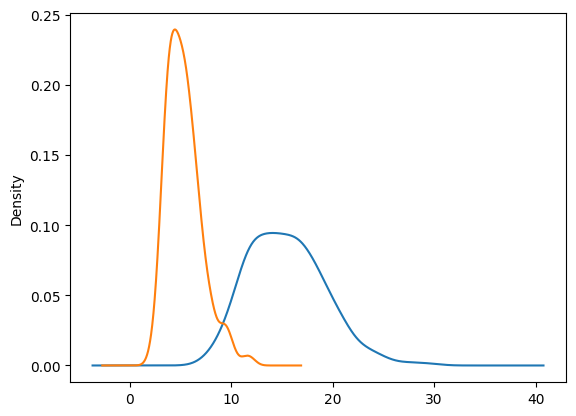

In [86]:
contam["dioxido_nitrogeno"].plot.density()
contam["monoxido_carbono"].plot.density()

In [89]:
redmet = pandas.read_csv("redmet_2022.csv", index_col=0)

redmet.head()

,RH,TMP,WDR,WSP
fecha,,,,
2022-01-01,44.808362,15.316545,174.009766,1.458594
2022-01-02,47.470383,14.371273,190.490494,2.208935
2022-01-03,61.131769,13.247547,171.861660,1.663043
2022-01-04,49.406427,14.986535,159.283096,1.285743
2022-01-05,42.854281,15.608000,156.118095,1.459048


In [91]:
data = pandas.concat([contam, redmet], axis=1)

data.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10,RH,TMP,WDR,WSP
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667,44.808362,15.316545,174.009766,1.458594
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000,47.470383,14.371273,190.490494,2.208935
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333,61.131769,13.247547,171.861660,1.663043
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333,49.406427,14.986535,159.283096,1.285743
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000,42.854281,15.608000,156.118095,1.459048


In [92]:
data.corr(method="spearman")

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10,RH,TMP,WDR,WSP
ozono,1.000000,0.197253,0.181516,0.051342,0.481537,-0.528666,0.635349,-0.287051,0.078500
dioxido_azufre,0.197253,1.000000,0.416420,0.296297,0.585443,-0.237937,-0.149865,-0.178445,-0.295829
dioxido_nitrogeno,0.181516,0.416420,1.000000,0.847467,0.643303,-0.266630,-0.200532,-0.349192,-0.658366
monoxido_carbono,0.051342,0.296297,0.847467,1.000000,0.571305,-0.260244,-0.202981,-0.353598,-0.564960
PM10,0.481537,0.585443,0.643303,0.571305,1.000000,-0.554217,0.108240,-0.351329,-0.225444
RH,-0.528666,-0.237937,-0.266630,-0.260244,-0.554217,1.000000,-0.359837,0.264784,-0.245689
TMP,0.635349,-0.149865,-0.200532,-0.202981,0.108240,-0.359837,1.000000,-0.132241,0.346125
WDR,-0.287051,-0.178445,-0.349192,-0.353598,-0.351329,0.264784,-0.132241,1.000000,0.267509
WSP,0.078500,-0.295829,-0.658366,-0.564960,-0.225444,-0.245689,0.346125,0.267509,1.000000


<Axes: >

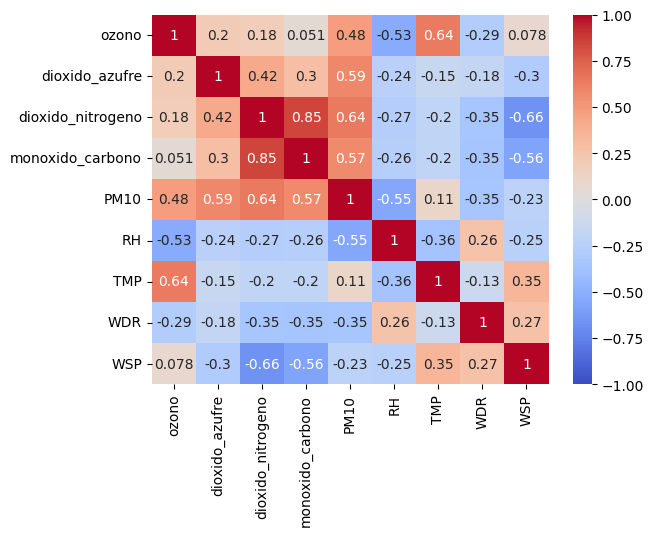

In [101]:
seaborn.heatmap(
    data.corr(method="spearman"), 
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

In [100]:
pingouin.pairwise_corr(data).sort_values(by="r", ascending=False).round(3)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
15,dioxido_nitrogeno,monoxido_carbono,pearson,two-sided,365,0.845,"[0.81, 0.87]",0.000,6.468e+96,1.000
5,ozono,TMP,pearson,two-sided,365,0.671,"[0.61, 0.72]",0.000,6.141e+45,1.000
16,dioxido_nitrogeno,PM10,pearson,two-sided,365,0.626,"[0.56, 0.69]",0.000,7.573e+37,1.000
21,monoxido_carbono,PM10,pearson,two-sided,365,0.559,"[0.48, 0.63]",0.000,1.619e+28,1.000
3,ozono,PM10,pearson,two-sided,365,0.482,"[0.4, 0.56]",0.000,3.44e+19,1.000
10,dioxido_azufre,PM10,pearson,two-sided,365,0.456,"[0.37, 0.53]",0.000,1.245e+17,1.000
8,dioxido_azufre,dioxido_nitrogeno,pearson,two-sided,365,0.311,"[0.21, 0.4]",0.000,5.937e+06,1.000
34,TMP,WSP,pearson,two-sided,365,0.296,"[0.2, 0.39]",0.000,1.009e+06,1.000
31,RH,WDR,pearson,two-sided,365,0.286,"[0.19, 0.38]",0.000,3.146e+05,1.000
35,WDR,WSP,pearson,two-sided,365,0.282,"[0.18, 0.37]",0.000,2.037e+05,1.000


<Axes: >

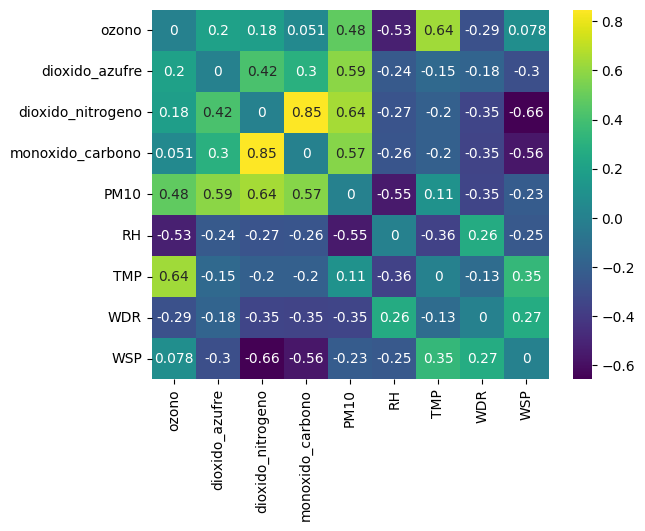

In [111]:
corr = data.corr(method="spearman")

for i in range(len(corr)):
    corr.iloc[i, i] = 0

seaborn.heatmap(
    corr, 
    annot=True,
    cmap="viridis",
    # vmin=-1,
    # vmax=1,
)